# Capture faces form video

In [27]:
# import the necessary packages
import face_recognition
import argparse
import imutils
import pickle
import time
import datetime
import cv2

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# input data
# input = "assets/videos/lunch_scene.mp4"
input = "assets/videos/produce48-B.mp4"
output = "dataset/produce48/"
detection_method = "hog"
gap_sec = 0.5 # capture frame every 0.5 sec.
total_faces = 100
margin = 80

In [21]:
# initialize
print("[INFO] processing video...")

stream = cv2.VideoCapture(input)
frame_rate = stream.get(cv2.CAP_PROP_FPS)
gap = gap_sec * frame_rate
frame_no = 0

print("frame gap:", gap)

[INFO] processing video...
frame gap: 14.985014985014985


In [22]:
# loop over frames from the video file stream
faces = []
faces_time = []
while True:
    stream.set(cv2.CAP_PROP_POS_FRAMES,frame_no)
    frame_no += gap

    # grab the next frame
    (grabbed, frame) = stream.read()

    # if the frame was not grabbed, then we have reached the
    # end of the stream
    if not grabbed or len(faces) >= total_faces:
        break

    # convert the input frame from BGR to RGB then resize it to have
    # a width of 750px (to speedup processing)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    rgb = imutils.resize(frame, width=750)
    r = frame.shape[1] / float(rgb.shape[1])

    # detect the (x, y)-coordinates of the bounding boxes
    # corresponding to each face in the input frame, then compute
    # the facial embeddings for each face
    boxes = face_recognition.face_locations(rgb,
        model=detection_method)

    # loop over the recognized faces
    for (top, right, bottom, left) in boxes:
        # rescale the face coordinates
        top = int(top * r)
        right = int(right * r)
        bottom = int(bottom * r)
        left = int(left * r)

#         top = top if top > 0 else 0
#         left = left if left > 0 else 0
#         bottom = bottom if bottom < rgb.shape[0] else rgb.shape[0]
#         right = right if right < rgb.shape[1] else rgb.shape[1]
            
        time = int(frame_no/frame_rate)

        crop = frame[top-margin:bottom+margin, left-margin:right+margin]
        
        if crop.shape[0] > 0 and crop.shape[1] > 0:
            scale = 150 / max(crop.shape)
            crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
            crop = cv2.resize(crop, (0,0), fx=scale, fy=scale)
            faces.append(crop)
            faces_time.append(time)
        
#       print("Time:", time)
#       print("Position:", top, right, bottom, left)       
#       print(len(faces), time)


In [23]:
len(faces)

100

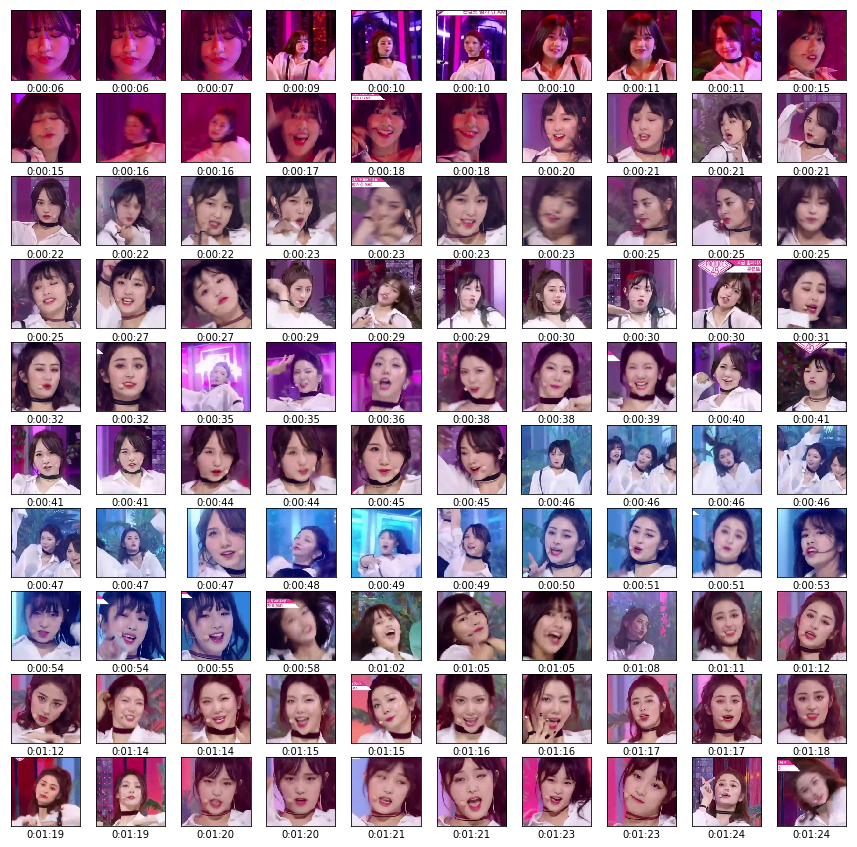

In [24]:
# show result
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces[i], cmap=plt.cm.binary)
    plt.xlabel(str(datetime.timedelta(seconds=faces_time[i])))

In [25]:
# close the video file pointers
stream.release()

In [26]:
# Save faces to file
for i, face in enumerate(faces):
    cv2.imwrite('%s%d-%s.jpg'% (output,i, str(datetime.timedelta(seconds=faces_time[i]))), 
            cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
